In [1]:
from webapp.api.wine import StockCounter
import plotly.express as px

In [2]:
counter = StockCounter()

Loading df for today
Oldest datapoint is 2020-04-11 14:03:43
Latest datapoint is 2020-04-12 13:03:38
Calculated stock change df


In [3]:
counter.online_df.sort_values(by=['id','timestamp']).groupby('timestamp').first()

,Unnamed: 0,wine_name,id,stock,wine_img,wine_type,wine_origin,stock_delta,wine_consumption,cumulative_wine_consumption
timestamp,,,,,,,,,,
2020-04-11 14:03:43,527,Mara Valpolicella Ripasso Superiore,147482,146,https://www.saq.com/media/catalog/product/1/0/...,Red wine,Italy,0.0,0.0,0.0
2020-04-11 15:03:40,522,Mara Valpolicella Ripasso Superiore,147482,129,https://www.saq.com/media/catalog/product/1/0/...,Red wine,Italy,-17.0,17.0,17.0
2020-04-11 16:02:50,527,Mara Valpolicella Ripasso Superiore,147482,115,https://www.saq.com/media/catalog/product/1/0/...,Red wine,Italy,-14.0,14.0,31.0
2020-04-11 17:03:47,515,Mara Valpolicella Ripasso Superiore,147482,92,https://www.saq.com/media/catalog/product/1/0/...,Red wine,Italy,-23.0,23.0,54.0
2020-04-11 18:02:51,510,Mara Valpolicella Ripasso Superiore,147482,69,https://www.saq.com/media/catalog/product/1/0/...,Red wine,Italy,-23.0,23.0,77.0
2020-04-11 19:05:21,510,Mara Valpolicella Ripasso Superiore,147482,53,https://www.saq.com/media/catalog/product/1/0/...,Red wine,Italy,-16.0,16.0,93.0
2020-04-11 20:02:55,506,Mara Valpolicella Ripasso Superiore,147482,51,https://www.saq.com/media/catalog/product/1/0/...,Red wine,Italy,-2.0,2.0,95.0
2020-04-11 21:02:26,504,Mara Valpolicella Ripasso Superiore,147482,48,https://www.saq.com/media/catalog/product/1/0/...,Red wine,Italy,-3.0,3.0,98.0
2020-04-11 22:04:52,114,Château des Jacques Morgon Côte du Py,147671,9,https://www.saq.com/media/catalog/product/1/4/...,Red wine,France,0.0,0.0,0.0


This should be monotonically increasing, but it doesn't seem to be

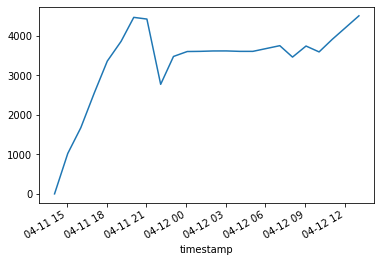

In [8]:
counter.online_df.groupby('timestamp')['cumulative_wine_consumption'].sum().plot()

Is this because wines are dropping out of the series as they sell out?

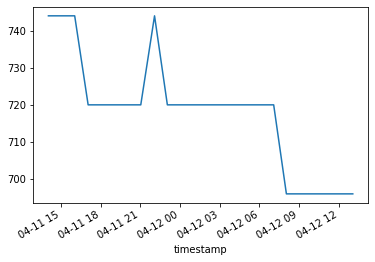

In [12]:
counter.online_df.groupby(['timestamp'])['id'].count().plot()

The online range does seem to be reducing over time, which could explain drops in total consumption.. The right way to counter this is to sum the wine consumption at every time point, then sum over the entire series

In [17]:
counter.online_df.groupby('timestamp').sum()['wine_consumption'].sum()

7061.0

And this is *not* the same as the answer returned by the previous method:

In [20]:
counter.online_df.groupby('timestamp')['cumulative_wine_consumption'].sum().max() - counter.online_df.groupby('timestamp')['cumulative_wine_consumption'].sum().min() 

4509.0

Splitting this up by wine type

In [26]:
counter.online_df.groupby(['wine_type']).sum()['wine_consumption']

wine_type
Red wine      5193.0
Rosé           699.0
White wine    1169.0
Name: wine_consumption, dtype: float64

In [27]:
counter.online_df['wine_consumption'].sum()

7061.0